In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/7-clustering/auto-insurance.csv")

In [5]:
# Preview the data
print("Data Preview:")
print(data.head())


Data Preview:
   108  392.5
0   19   46.2
1   13   15.7
2  124  422.2
3   40  119.4
4   57  170.9


In [7]:
# Step 1: Data Exploration
print("\nData Information:")
print(data.info())



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   108     62 non-null     int64  
 1   392.5   62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


In [9]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              108       392.5
count   62.000000   62.000000
mean    21.532258   93.440323
std     20.823787   79.424284
min      0.000000    0.000000
25%      7.250000   38.475000
50%     14.000000   71.300000
75%     28.500000  137.150000
max    124.000000  422.200000


In [11]:
print(data.isnull().sum())

108      0
392.5    0
dtype: int64


In [14]:
# there is no missing value
# Normalize the data 
scaler = StandardScaler()
data2 = scaler.fit_transform(data)

# Elbow curve

In [17]:
# Initilize variable to store wcss
from sklearn.cluster import KMeans
k_val = range(1,10)
wcss = []
for k in k_val:
    kmeans = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

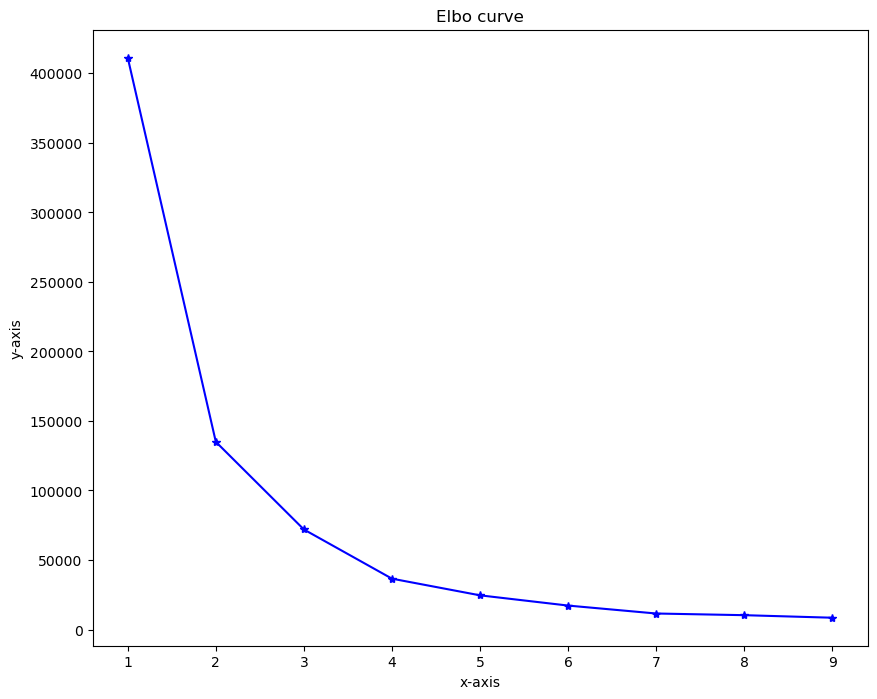

In [19]:
# plot elbo curve 
plt.figure(figsize=(10,8))
plt.plot(k_val,wcss, marker="*", color="blue")
plt.title("Elbo curve")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

# K-Means

In [50]:
km = KMeans(n_clusters=2, random_state=42)
y_predicted = km.fit_predict(data2)

C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
data1 = y_predicted

In [54]:
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[-0.41005511 -0.42833196]
 [ 1.40590323  1.46856671]]


In [56]:
#display first few rows
print(data.head())

   108  392.5
0   19   46.2
1   13   15.7
2  124  422.2
3   40  119.4
4   57  170.9


In [76]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = np.abs(zscore(data))

# Define the threshold (e.g., 3)
threshold = 3

# Filter out rows where any Z-score exceeds the threshold
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Display the data without outliers
print(data_no_outliers)


    108  392.5
0    19   46.2
1    13   15.7
3    40  119.4
4    57  170.9
5    23   56.9
..  ...    ...
57    9   87.4
58   31  209.8
59   14   95.5
60   53  244.6
61   26  187.5

[61 rows x 2 columns]


C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


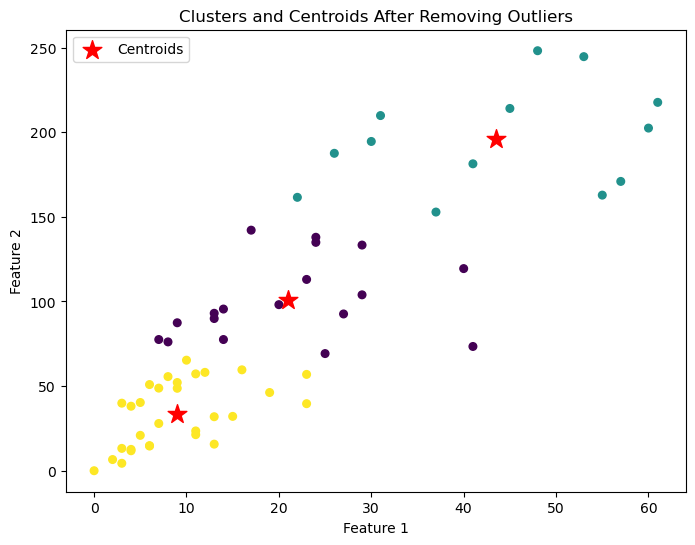

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data_no_outliers' is the data after outliers have been removed

# Perform KMeans clustering
km = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predicted = km.fit_predict(data_no_outliers)  # Fit the model and predict the clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_no_outliers.iloc[:, 0], data_no_outliers.iloc[:, 1], c=y_predicted, cmap='viridis', s=30)  # Scatter plot with cluster labels

# Plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')

# Adding titles and labels
plt.title('Clusters and Centroids After Removing Outliers')
plt.xlabel('Feature 1')  # Update with actual column names if necessary
plt.ylabel('Feature 2')  # Update with actual column names if necessary
plt.legend()

# Show the plot
plt.show()
